In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [7]:
#Dtree has less accuracy but less time
#KNN has more accuracy but takes more time
# data=pd.read_csv('../data/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
data=pd.read_csv('../../data/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 33.1+ MB


In [8]:
data=data.dropna()
data=data.reset_index(drop=True)
data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,16,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [9]:
(data.Games.unique())

array(['2014 Winter', '1948 Summer', '1952 Summer', '1992 Winter',
       '1994 Winter', '2002 Winter', '2006 Winter', '1996 Summer',
       '2016 Summer', '2008 Summer', '2012 Summer', '2000 Summer',
       '2004 Summer', '1980 Summer', '1984 Summer', '1992 Summer',
       '1988 Summer', '1960 Summer', '1964 Summer', '1972 Summer',
       '1924 Winter', '1912 Summer', '1932 Summer', '1924 Summer',
       '1920 Summer', '1988 Winter', '1968 Winter', '1976 Summer',
       '2010 Winter', '1956 Summer', '1972 Winter', '1908 Summer',
       '1980 Winter', '1984 Winter', '1968 Summer', '1998 Winter',
       '1960 Winter', '1936 Summer', '1928 Summer', '1976 Winter',
       '1964 Winter', '1936 Winter', '1956 Winter', '1932 Winter',
       '1904 Summer', '1952 Winter', '1906 Summer', '1900 Summer',
       '1896 Summer', '1948 Winter', '1928 Winter'], dtype=object)

In [10]:
#remove the waste parameters
data.head()
cols_to_drop=[
    'Name'
]
data=data.drop(cols_to_drop,axis=1)
#print np.unique(data[["color"]],return_counts=True)[0]
#print np.unique(data[["content_rating"]],return_counts=True)[0]
#data.head()
#data1.head()
#new data frame in df
data.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,16,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,17,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,17,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,17,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,17,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [11]:
def convert_color(s):
        if s=='color':
            return 1
        else:
            return 0
        
def convert(s,li):
        return li.index[s]

def convertor(datalist,lis): 
    table_data = {}
    for t, ix in enumerate(lis):
        table_data[ix] = t
    elem = []
    for ix in datalist:
        elem.append(table_data[ix])
    return elem

def conv(datalist):
    if datalist>=0 and datalist<2.5:
        return 'D'
    elif datalist>=2.5 and datalist<5.0:
        return 'C'
    elif datalist>=5.0 and datalist<7.5:
        return 'B'
    else:
        return 'A'

In [13]:
sex=np.unique(data[["Sex"]])
team=np.unique(data[["Team"]])
noc=np.unique(data[["NOC"]])
games=np.unique(data[["Games"]])
season=np.unique(data[["Season"]])
city=np.unique(data[["City"]])
sport=np.unique(data[["Sport"]])
event=np.unique(data[["Event"]])
medal=np.unique(data[["Medal"]])
print sex
print data['Sex'].unique()

['F' 'M']
['M' 'F']


In [ ]:
data.Sex=convertor(data.Sex,sex)
data.Team=convertor(data.Team,team)
data.NOC=convertor(data.NOC,noc)
data.Games=convertor(data.Games,games)
data.Season=convertor(data.Season,season)
data.City=convertor(data.City,city)
data.Sport=convertor(data.Sport,sport)
data.Event=convertor(data.Event,event)
data.Medal=convertor(data.Medal,medal)

In [9]:
#sns.heatmap(data.corr())
data = data.reset_index(drop=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 0 to 30180
Data columns (total 14 columns):
ID        30181 non-null int64
Sex       30181 non-null int64
Age       30181 non-null float64
Height    30181 non-null float64
Weight    30181 non-null float64
Team      30181 non-null int64
NOC       30181 non-null int64
Games     30181 non-null int64
Year      30181 non-null int64
Season    30181 non-null int64
City      30181 non-null int64
Sport     30181 non-null int64
Event     30181 non-null int64
Medal     30181 non-null int64
dtypes: float64(3), int64(11)
memory usage: 3.5 MB


,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,16,1,28,184,85,75,40,49,2014,1,34,25,293,0
1,17,1,28,175,64,75,40,15,1948,0,17,22,274,0
2,17,1,28,175,64,75,40,15,1948,0,17,22,280,1
3,17,1,28,175,64,75,40,15,1948,0,17,22,273,1
4,17,1,28,175,64,75,40,15,1948,0,17,22,277,1


In [10]:
data = data.dropna() #drops the the rows with NAN
#data.describe() #TO-DO read what is quartile percentile
#surived is the target class
data.Medal.unique()
data.columns

Index([u'ID', u'Sex', u'Age', u'Height', u'Weight', u'Team', u'NOC', u'Games',
       u'Year', u'Season', u'City', u'Sport', u'Event', u'Medal'],
      dtype='object')

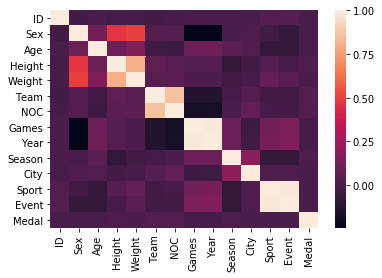

In [11]:
plt.figure()
sns.heatmap(data.corr())
#how much change in a perticular coloumn is dependent of another coloumn
#diagonal are relation of one col  with itself there for 1

In [12]:
#adding the data to the decision tree
#oot node is useually the most imp col
input_cols = ['ID', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event']
out_cols = ['Medal']

X = data[input_cols]
y = data[out_cols]

#X.head()
print X.shape, y.shape

(30181, 13) (30181, 1)


In [13]:
#when you drop some the indexs remains same therefore we reindex them
#df.loc[3] loc is for location and 3 is the row number \, from this we get this particular row 
data = data.reset_index(drop=True)
print X.shape, y.shape

(30181, 13) (30181, 1)


# Functions for Decision Tree

In [14]:
#method to divide the data
#1st-dataset
#2nd-feature
#3rd value of the feature on which it has to be divided
#TODO read about pd.DataFrame
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns) 
    x_left = pd.DataFrame([], columns=x_data.columns)
    
    
    for ix in range(x_data.shape[0]): #for evry row
        # Retrieve the current value for the fkey column
        val = x_data[fkey].loc[ix]
        
        # Check where the row needs to go
        if val > fval:
            # pass the row to right
            x_right = x_right.append(x_data.loc[ix])
        else:
            # pass the row to left
            x_left = x_left.append(x_data.loc[ix])
    
    # return the divided datasets
    return x_left, x_right


def entropy(col):
    counts = np.unique(col, return_counts=True)
    N=float(col.shape[0])
    ent=0.0
    for ix in range(counts[0].shape[0]): #for every unique value
        frac=counts[1][ix]/N
        ent+=(-1.0*frac*np.log2(frac))
    return ent
 
#sometimes the most correlatd feature is not the best option to split
def information_gain(xdata, fkey, fval):
    left, right = divide_data(xdata, fkey, fval)
    P=left.shape[0]/float(xdata.shape[0])
    Q=right.shape[0]/float(xdata.shape[0])
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000 #very large ingo gain is return so that this case never gets accepted
    #print left.survived
    return entropy(xdata.Medal) - (P*entropy(left.Medal) + Q*entropy(right.Medal))
    

# def information_gain(Xdata, fkey, fval):
#     left,right=divide_data(Xdata,fkey,fval)
#     if left.shape[0] == 0 or right.shape[0] == 0:
#         return -10000 #very large ingo gain is return so that this case never gets accepted
#     #print left.survived
#     return entropy(Xdata)-(left.shape[0]/Xdata.shape[0])*entropy(left) -(right.shape[0]/Xdata.shape[0])*entropy(right)

In [15]:
for fx in X.columns:
    print fx, " : " ,information_gain(data, fx, data[fx].mean())

ID  :  2.627317158054865e-06
Sex  :  5.7991261359191526e-05
Age  :  0.00012043577710563191
Height  :  0.0003183318278345837
Weight  :  0.00030545023748507205
Team  :  0.0038333474161684755
NOC  :  0.0031400274937913863
Games  :  0.0003083535773416024
Year  :  0.00031822363182199
Season  :  8.292273781407289e-05
City  :  1.8950602154177432e-07
Sport  :  3.920243717869809e-06
Event  :  6.218190179874128e-06


# The DT class

In [16]:
class DecisionTree:
    def __init__(self, depth=0, max_depth=5): #prop of each node of the tree
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None #helpfull at the leaf node and while pruning
    #its complexity is O(noOfRows*Col*2^Max_depth)
    #kNN has 0 training time
    def train(self, X_train):
        print self.depth, '-'*10
        # Get the best possible feature and division value
        features = ['ID', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event']
        gains = [] #or IG
        for fx in features:
            gains.append(information_gain(X_train, fx, X_train[fx].mean()))
        
        # store the best feature (using min information gain)
        self.fkey = features[np.argmax(gains)]
        self.fval = X_train[self.fkey].mean()
        
        # divide the dataset
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        # Check the shapes
        #if the data can be further divided or not
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            lis=[]
            lis=X_train.Medal
            lis=np.unique(lis,return_counts=True)
            self.target=lis[0][np.agrmax(lis[1])]
            return
        #if the max depth is reached
        if self.depth >= self.max_depth:
            lis=[]
            lis=X_train.Medal
            lis=np.unique(lis,return_counts=True)
            self.target=lis[0][np.agrmax(lis[1])]
            return
      #recursive calls for each child node  
        # branch to right
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)
        # branch to left
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        lis=[]
        lis=X_train.Medal
        lis=np.unique(lis,return_counts=True)
        if lis.size
        self.target=lis[0][np.agrmax(lis[1])]
        return
    #predict function of the decision tree
    #it's complexity is O(Max_depth)
    #knn has O(m*n) hence DTree is better
#     def predict(self, test):
#         if self.fval>test[self.fkey]:
#             if self.right is None:
#                 return self.target
#             return self.right.predict(test)
#         else:
#             if self.left is None:
#                  return self.target
#             return self.left.predict(test)

In [17]:
split = int(0.8 * data.shape[0])

training_data = data[:split]
testing_data = data[split:]

In [18]:
dt = DecisionTree()
dt.train(training_data)

0 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------


AttributeError: 'module' object has no attribute 'agrmax'

In [ ]:
print dt.fkey, dt.fval
print dt.right.fkey, dt.right.fval
print dt.left.fkey, dt.left.fval

print dt.right.right.fkey, dt.right.right.fval
print dt.right.left.fkey, dt.right.left.fval


print dt.left.right.fkey, dt.left.right.fval
print dt.left.left.fkey, dt.left.left.fval


In [ ]:
for ix in testing_data.index[:10]:
    print dt.predict(testing_data.loc[ix])
    print testing_data.loc[ix]
    print '-'*15

In [ ]:
testing_data.head(10)

In [ ]:
import sklearn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X[:split], y[:split])

In [ ]:
DT.score(X[split:], y[split:])

In [ ]:
#for practical use Random Forset is much more efficient
rf = RandomForestClassifier(n_estimators=100) #default has gini but if you add ,criterion='entropy' the accuracy increases
rf.fit(X[:split], y[:split])

rf.score(X[split:], y[split:]) #accuracy